###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 Lorena A. Barba, Tingyu Wang

# The matrix is everywhere…

This is a classic quote that has nothing to do with our lesson here: 
> _"The Matrix is everywhere, it is all around us, even now in this very room."_ (Morpheus)

We just couldn't help making a quip about the 1999 film [The Matrix](https://en.wikipedia.org/wiki/The_Matrix)!

In this lesson, we revisit the key idea that a matrix is a linear transformation, and expand on it with three more perspectives on what matrices are and do: a matrix transforms a circle to an ellipse; a matrix is a system of equations; and, a matrix is a change of basis. We then play with matrices in three-dimensional space, and introduce the important concept of _rank_ of a matrix.

To explore 3D transformations, we'll take advantage of the interactive mode of figures in Jupyter notebooks, using the `%matplotlib notebook` magic. For the 2D figures, this feature is not needed, but (as far as we know) we need to use the same plotting mode (called "backend") in the whole notebook. So we will set this lesson to interactive mode, and pass a flag to our plotting helper script. You can go ahead and click the "Stop" icon on the 2D figures, as you work through the lesson.

In [1]:
import numpy
%matplotlib notebook
from matplotlib import pyplot

In [2]:
import sys
sys.path.append('../scripts/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
import plot_config
plot_config.use_notebook = True
from plot_helper import *

## A matrix is a linear transformation

In the first lesson of this module, we saw that a matrix corresponds to a linear transformation. For example, the matrix 
$$A = \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}$$

via matrix-vector multiplication, will transform the unit vectors to its columns:

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ -1 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Let's use our helper function `plot_linear_transformation()` to visualize what this matrix does to the unit vectors and a grid on the 2D plane:

<IPython.core.display.Javascript object>


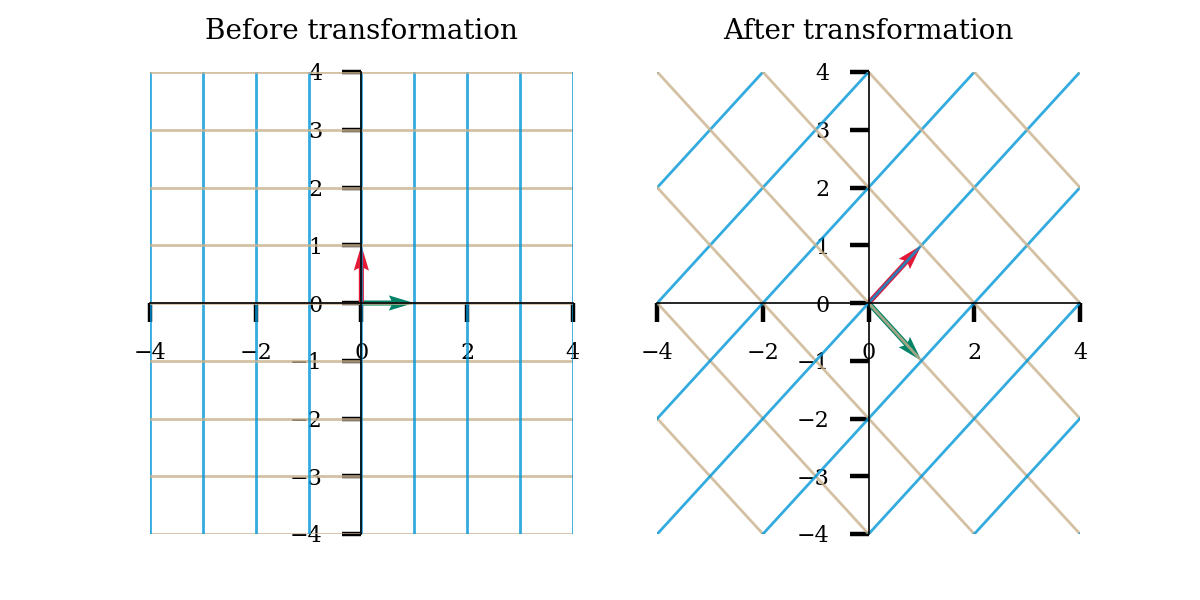

In [3]:
A = numpy.array([[1,1], [-1,1]])
plot_linear_transformation(A)

You see that the transformation $A$ is a 45-degree clockwise rotation, plus a scaling by a factor that stretched the vectors $\mathbf{i}$ and $\mathbf{j}$ (shown in green and red) into vectors of more length. 
How much is the scaling factor?

To start, we'll create the basis vectors and the vectors where they land, $\mathbf{a}$ and $\mathbf{b}$, corresponding to the columns of $A$.

In [4]:
i = numpy.array([1,0])
j = numpy.array([0,1])

In [5]:
a = numpy.array([1,-1])
b = numpy.array([1, 1])

We can resort to geometry to compute the length of the vectors $\mathbf{i}$ and (its transformation) $\mathbf{a}$, and compare them. But first, a plot of the two vectors helps us visualize.

<IPython.core.display.Javascript object>


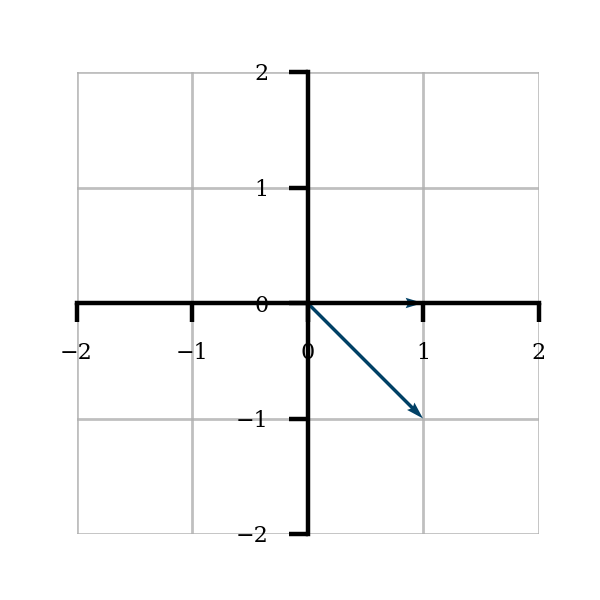

In [6]:
vectors = [i, a]
plot_vector(vectors)

For $\mathbf{i}$, we already know the length: it's a unit vector for a reason! We can also see right on the plot that its length is $1.0$. In the case of $\mathbf{a}$, we can imagine a right triangle where $\mathbf{a}$ is the hypotenuse, and remember the Pythagorean theorem for its length, which we also call the **norm** of the vector:

$$ ||\mathbf{a}||= \sqrt{1^2 + 1^2} = \sqrt{2}$$

##### Definition:

> The **Euclidean norm** of a 2D vector, that is, its length (or magnitude) is: $||\mathbf{x}||= \sqrt{x^2 + y^2}$, where $(x,y)$ are its coordinates. This definition generalizes to any dimension by adding all squared components under the square root.

The NumPy sub-package [`numpy.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#module-numpy.linalg) contains many useful functions, including one to compute the norm of a vector (or matrix). Try it with $\mathbf{i}$ and $\mathbf{a}$.

In [7]:
numpy.linalg.norm(i)

1.0

In [8]:
numpy.linalg.norm(a)

1.4142135623730951

In [9]:
numpy.sqrt(2)

1.4142135623730951

Happy? 
After the transformation, the two unit vectors got scaled by $\sqrt{2}$, and each grid box in the transformed plot has a side length of $\sqrt{2}$. 

Consider an arbitrary vector in the plane, $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$.

Through the matrix-vector multiplication $A\mathbf{x}$, the vector lands on the transformed space onto the combination of the matrix columns scaled by the vector components:

$$
   A\mathbf{x} = x\,\mathbf{a} + y\,\mathbf{b}
$$

This transformation rotates the vector by 45 degrees clockwise, and scales its length by $\sqrt{2}$.
The reverse action would be to rotate the space 45 degrees counter-clockwise, then scale all vectors by $\frac{1}{\sqrt{2}}$. 

At the end of our previous lesson, we learned to compute the inverse of a matrix using the `numpy.linalg` sub-package of NumPy, and we made a plot of a transformation and its inverse with our helper functions. 
Let's see how that looks for $A$.

<IPython.core.display.Javascript object>


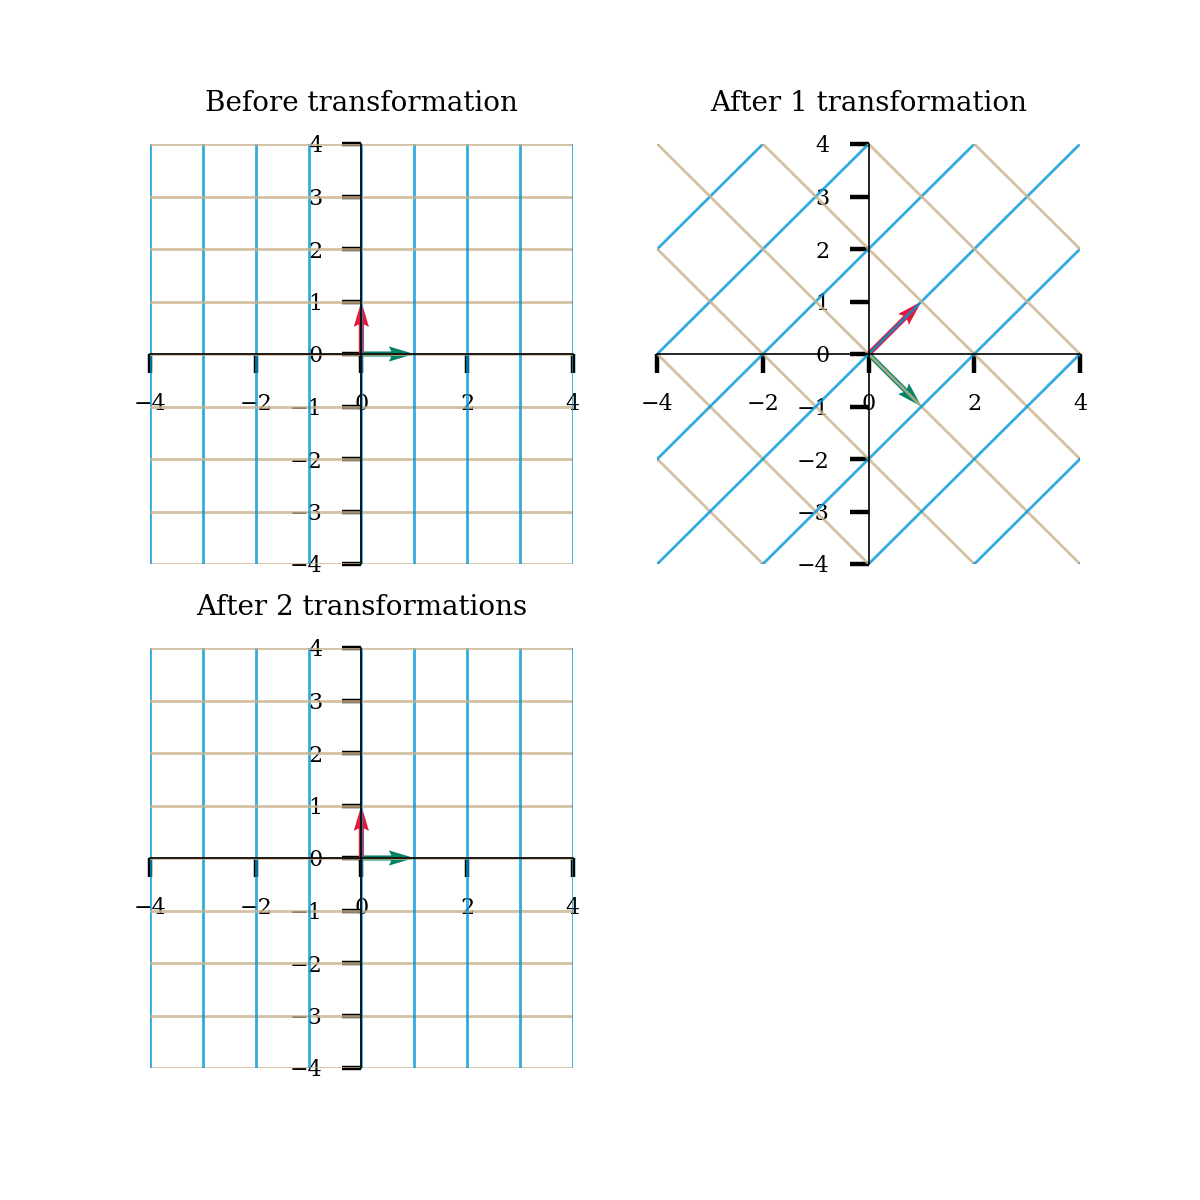

In [10]:
A_inv = numpy.linalg.inv(A)
plot_linear_transformations(A, A_inv)

Alright! Like we expected, the two transformations in sequence bring all vectors right back to where they started.
This reflects that the matrix multiplication $A^{-1}A$ is equal to the identity matrix, $I$.

##### Note:

In the previous lesson, we used the command 
```Python
from numpy.linalg import inv
```
This creates a shortcut `inv()` to [`numpy.linalg.inv()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv), to save us some typing. But all the functions of `numpy.linalg` are already available to us when we import NumPy, and this command is not necessary. It's just a convenience—and sometimes a matter of style: many Pythonistas like to say that "explicit is better than implicit" and type the long name, while others savagely try to cut down on typing.

Let's visualize the action of $A^{-1}$ (the inverse of $A$) on its own:

<IPython.core.display.Javascript object>


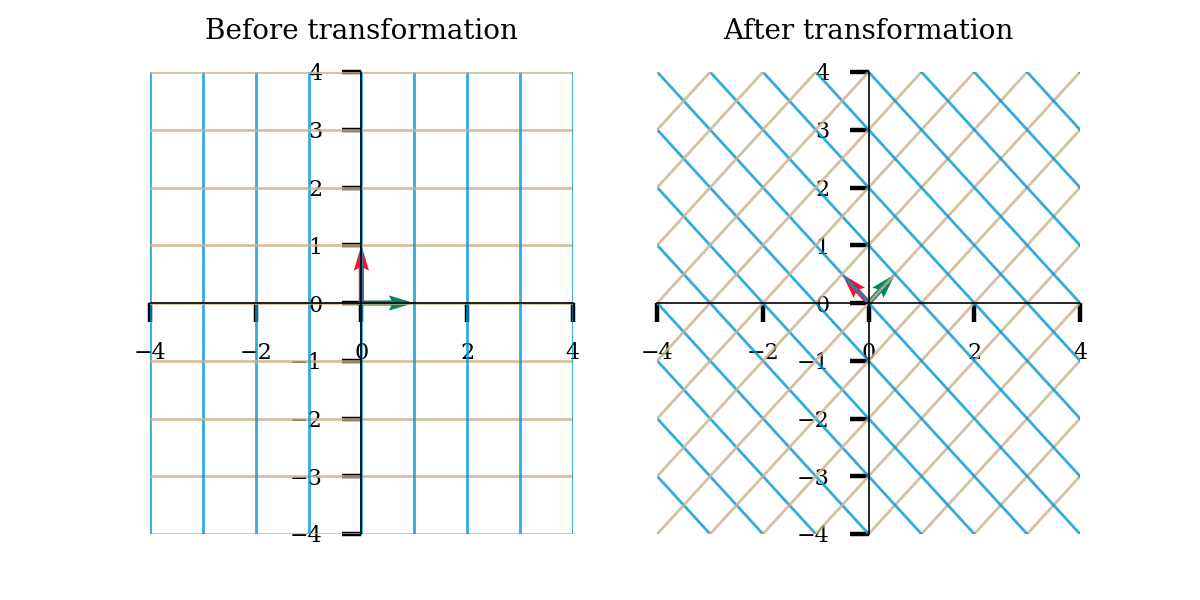

In [11]:
plot_linear_transformation(A_inv)

As we expected, $A^{-1}$ corresponds to a rotation by 45 degrees to the left, and a scaling factor that shrank the unit vectors. By how much? Let's see.

In [12]:
print(A_inv)

[[ 0.5 -0.5]
 [ 0.5  0.5]]


This matrix takes the unit vector $\mathbf{i}$ to a vector with coordinates $(0.5, 0.5)$. Using the Pythagorean theorem for triangles, we get the new length of the vector as $\sqrt{0.5^2+0.5^2}=\frac{1}{\sqrt{2}}$, as we expected.

Knowing the relationship between a matrix and its underlying transformation, we could visualize the reverse transformation of $A$ and might have easily computed $A^{-1}$ by hand, in this case.

##### Exercise

Create the following matrix as a NumPy array: 
$$B = \begin{bmatrix} 1 & 1 \\ 0 & -1 \end{bmatrix}$$

Use our helper function to visualize what it does to the unit vectors and a grid of lines. Then compute its inverse using `numpy.linalg.inv()`, and visualize the two transformations in sequence. Finally, visualize what the inverse does on its own. _Notice anything special?_

## A matrix transforms a circle to an ellipse

Let's play with the transformation corresponding to the matrix

$$C = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$$

[[2 1]
 [1 2]]


<IPython.core.display.Javascript object>


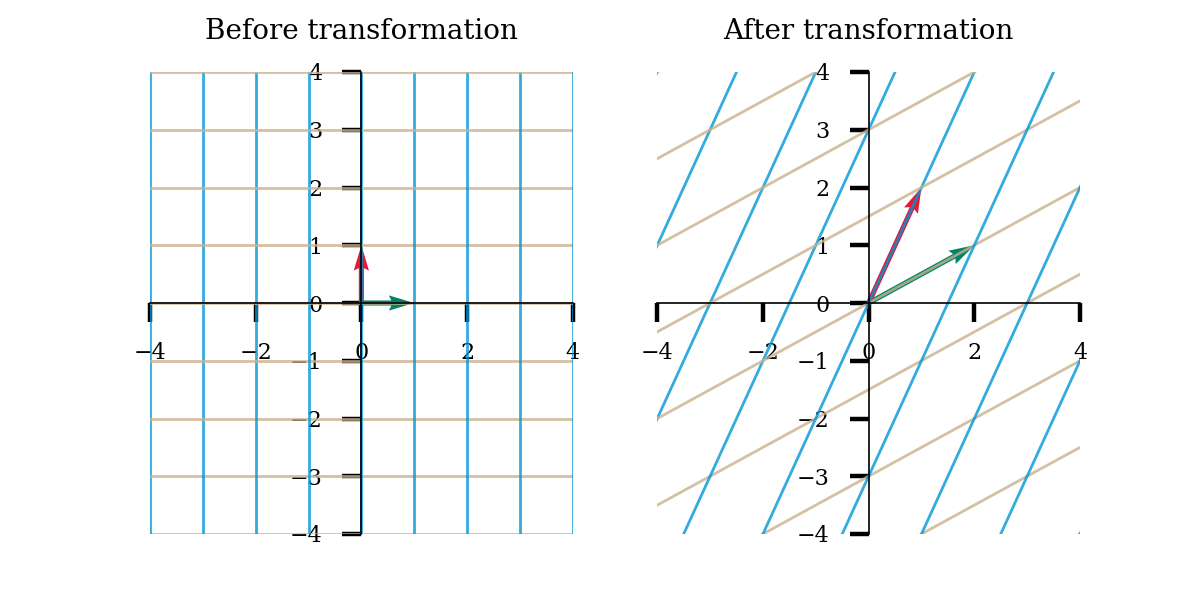

In [13]:
C = numpy.array([[2,1], [1,2]])
print(C)
plot_linear_transformation(C)

The unit vectors $\mathbf{i}$ and $\mathbf{j}$ land on the columns of $C$, which seems to rotate them toward each other and stretch them.

To visualize the effect of this matrix, let's plot a bunch of vectors of unit length, their heads together tracing a unit circle.
We start by creating an array of angles for these vectors, which we want to go around the origin from $0$ to $2\pi$.

In [14]:
alpha = numpy.linspace(0, 2*numpy.pi, 41)

Each vector's coordinates will be the pair $(\cos\alpha, \sin\alpha)$, with $\alpha$ taking all the angle values in our array.
To achieve a list of coordinate pairs, we can use a wonderful Python built-in function called `zip()`. If you pass it two iterable arguments of the same length (like lists or arrays), it _zips_ them into pairs.

In [15]:
vectors = list(zip(numpy.cos(alpha), numpy.sin(alpha)))

<IPython.core.display.Javascript object>


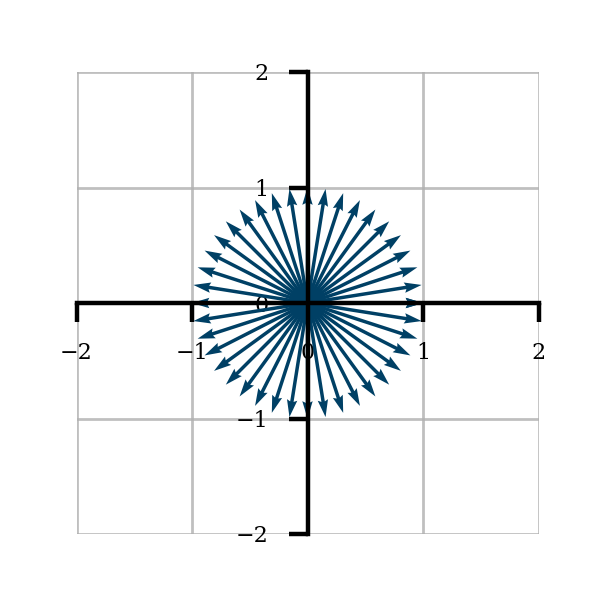

In [16]:
plot_vector(vectors)

In [17]:
vectors[0]

(1.0, 0.0)

In [18]:
C.dot(numpy.array(vectors[0]))

array([2., 1.])

OK. The first vector in our set is the unit vector $\mathbf{i}$, and like we knew already, it lands on the first column of $C$ by the transformation.

We next apply the transformation to all the vectors in our set, using a `for` statement, and we plot the transformed vectors.

In [19]:
newvectors = []
for i in range(len(vectors)):
    newvectors.append(C.dot(numpy.array(vectors[i])))

<IPython.core.display.Javascript object>


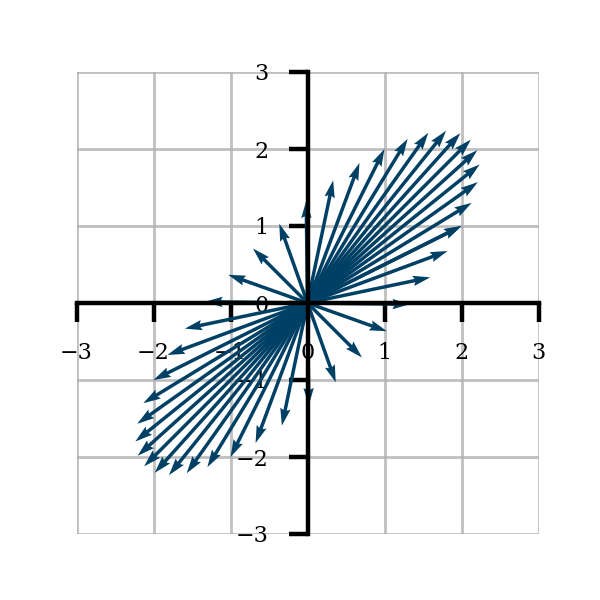

In [20]:
plot_vector(newvectors)

Neat! Our set of vectors whose coordinates traced a unit circle got transformed to trace an ellipse. 
It looks like the ellipse has its major axis along the 45-degree line. We can get an approximation to its semi-major and semi-minor axes by finding the longest and shortest vectors in this new set. 
We can use the `numpy.linalg.norm()` function for this.

In [21]:
lengths = []
for i in range(len(newvectors)):
    lengths.append(numpy.linalg.norm(newvectors[i]))

In [22]:
semi_major = max(lengths)
print(semi_major)

3.0000000000000004


In [23]:
semi_minor = min(lengths)
print(semi_minor)

1.0


Let's look at one of the vectors along the semi-major axis. Its magnitude (length) is $3.0$, and its direction is 45 degrees from the horizontal. This means its horizontal and vertical components are the same, and take the value:

In [24]:
semi_major/numpy.sqrt(2)

2.121320343559643

Next, we create a vector with these coordinates: call it $\mathbf{u}_1$. Call the vector that landed there after the transformation $\mathbf{v}_1$—in other words, $C\,\mathbf{v}_1 = \mathbf{u}_1$. 

Imagine multiplying the equation above by $C^{-1}$ to get $\mathbf{v}_1=C^{-1}\mathbf{u}_1$. We're saying that if $\mathbf{v}_1$ lands on $\mathbf{u}_1$ via the transformation $C$, then $\mathbf{u}_1$ lands on $\mathbf{v}_1$ via the transformation $C^{-1}$.

In the code below, we compute the inverse of $C$ and multiply it with $\mathbf{u}_1$ to get $\mathbf{v}_1$. Then we plot the two vectors together.


In [25]:
u1 = numpy.array([semi_major/numpy.sqrt(2), semi_major/numpy.sqrt(2)])
print(u1)

[2.12132034 2.12132034]


<IPython.core.display.Javascript object>


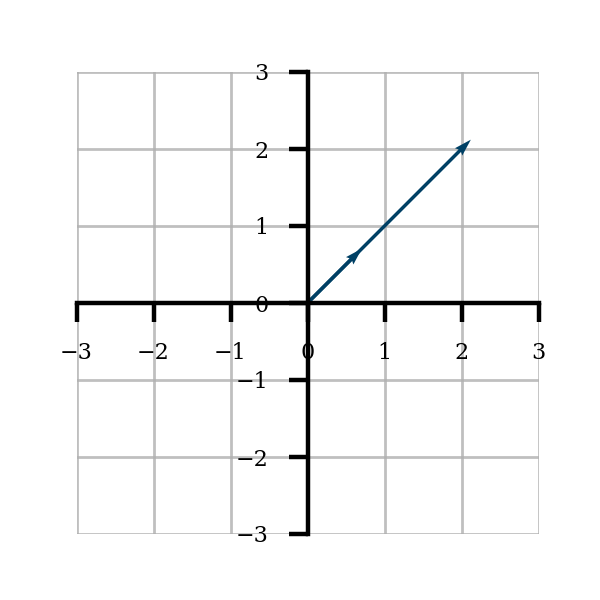

In [26]:
C_inv = numpy.linalg.inv(C)
v1 = C_inv.dot(u1)
plot_vector([u1,v1])

Funny. The vector $\mathbf{v}_1$ is transformed by the matrix $C$ into a scaled version of itself. In other words: $\mathbf{u}_1 = s_1 \mathbf{v}_1$, where $s_1$ is the scaling factor. So,

$$C\,\mathbf{v}_1 = s_1 \mathbf{v}_1$$

Wow. The effect of the matrix on this vector is just to scale it. 

Let's now look at one of the vectors along the semi-minor axis (we pick the one pointing right and down), and repeat this process.

In [27]:
u2 = numpy.array([semi_minor/numpy.sqrt(2), -semi_minor/numpy.sqrt(2)])
print(u2)

[ 0.70710678 -0.70710678]


[ 0.70710678 -0.70710678]


<IPython.core.display.Javascript object>


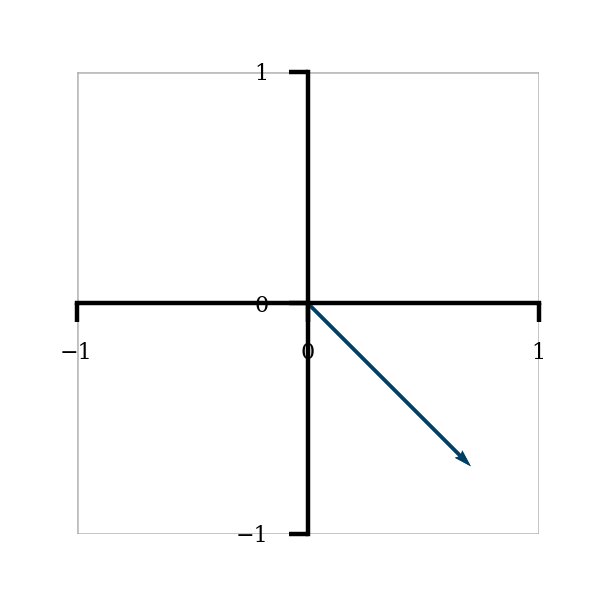

In [28]:
v2 = C_inv.dot(u2)
print(v2)
plot_vector([u2,v2])

In [29]:
numpy.linalg.norm(u2)

0.9999999999999999

Hmm. The effect of the matrix on the vector $\mathbf{v}_2$ is _also_ just to scale it, and the scaling factor is $1$.


The vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ are aligned "just right" so the effect of the transformation $C$ is to only scale them. They are special. They are  **eigenvectors** of $C$.

##### Key ideas:

> A 2D matrix transforms a unit circle to an ellipse on the plane.

> A vector that doesn't change direction after a linear transformation in an _eigenvector_ of the matrix.

## A matrix is a system of equations

For any vector $\mathbf{c}$ in the transformed space, can we find out what vector it came from before the transformation? That is, we'd like to find the vector $\mathbf{x}$ such that 

$$ A\mathbf{x}=\mathbf{c} $$

Take, for example, $\mathbf{c} = \begin{bmatrix} 1 \\ 5 \end{bmatrix}$ and the components of $\mathbf{x}$ as $(x, y)$. 

The vector $\mathbf{x}$ lands on $\mathbf{c}$ via the transformation $A$—that is, via the matrix-vector multiplication, which means a linear combination of the columns of $A$ scaled by the components of $\mathbf{x}$:

$$A\mathbf{x}= x \begin{bmatrix} 1 \\ -1 \end{bmatrix}+ y \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 5 \end{bmatrix}$$

(Using the matrix $A$ defined at the beginning of this lesson.) We're asking to find the scalars in a linear combination of the column vectors $\mathbf{a}$ and $\mathbf{b}$ that gives $\mathbf{c}$.


Writing this vector equation component-wise, we get two equations for the components $x$ and $y$:

$$
\begin{align*}
x + y &= 1 \\
-x + y &= 5
\end{align*}
$$

So, the question we are asking is answered by solving a system of two linear equations, for two unknowns! 

We already know how to answer it by means of the inverse linear transformation, via the matrix-vector multiplication $A^{-1}\mathbf{c}$. We can do this in NumPy:

In [30]:
c = numpy.array([1,5])
x = A_inv.dot(c)
print(x)

[-2.  3.]


The vector $\mathbf{x}$ is the **solution** of the linear system of equations. Look at the two linear equations again… we can isolate $y$ in each case, to re-write them as equations for lines in 2D space, i.e., in the form $y=mx+b$:


$$
\begin{align*}
y &= 1 - x\\
y &= 5 + x
\end{align*}
$$

To visualize these two lines, let's define an array of $x$-values, and then plot a line with each of these equations. We also add a marker at the point corresponding to the coordinates of the vector $\mathbf{x}$.

<IPython.core.display.Javascript object>


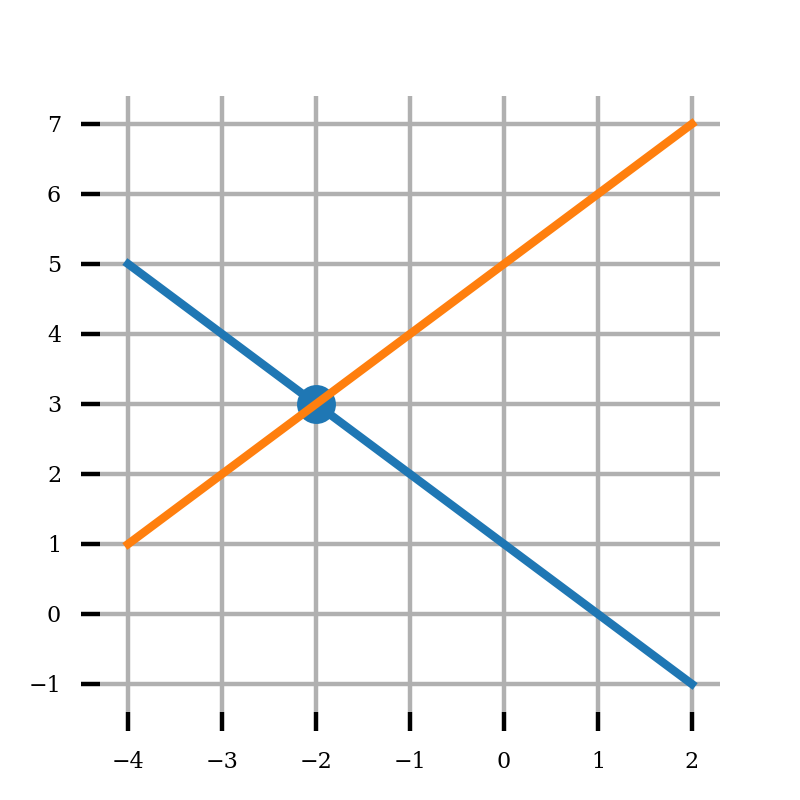

In [31]:
xvalues = numpy.linspace(-4,2)
m1, b1, m2, b2, = -1, 1, 1, 5

pyplot.figure(figsize=(2,2))
pyplot.plot(xvalues, m1*xvalues+b1)
pyplot.plot(xvalues, m2*xvalues+b2)
pyplot.scatter(x[0],x[1])
pyplot.box(False)
pyplot.grid(True);

You see that the coordinates of the solution vector $\mathbf{x}$ are right at the intersection of the two lines that correspond to the equations in the linear system. Indeed, the point $(-2,3)$ belongs to both lines, and satisfies both linear equations.

From this perspective, we look at the linear system row-by-row, and interpret each as a line in 2D space. It may even be a more familiar perspective to you. But it's less helpful when you start to think about systems of more dimensions!

NumPy also has a built-in function to solve a linear system of equations:  [`numpy.linalg.solve()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)—we give it the matrix, and the known vector on the right-hand side of the equation:

In [32]:
x = numpy.linalg.solve(A, c)
print(x)

[-2.  3.]


Suppose that we now want to solve a linear system with coefficient matrix $D$,

$$D = \begin{bmatrix} -2 & -1 \\ 1 & 0.5 \end{bmatrix}$$

Let's define this matrix as a NumPy array, and then visualize the transformation.

In [33]:
D = numpy.array([[-2,-1], [1,0.5]])
print(D)

[[-2.  -1. ]
 [ 1.   0.5]]


<IPython.core.display.Javascript object>


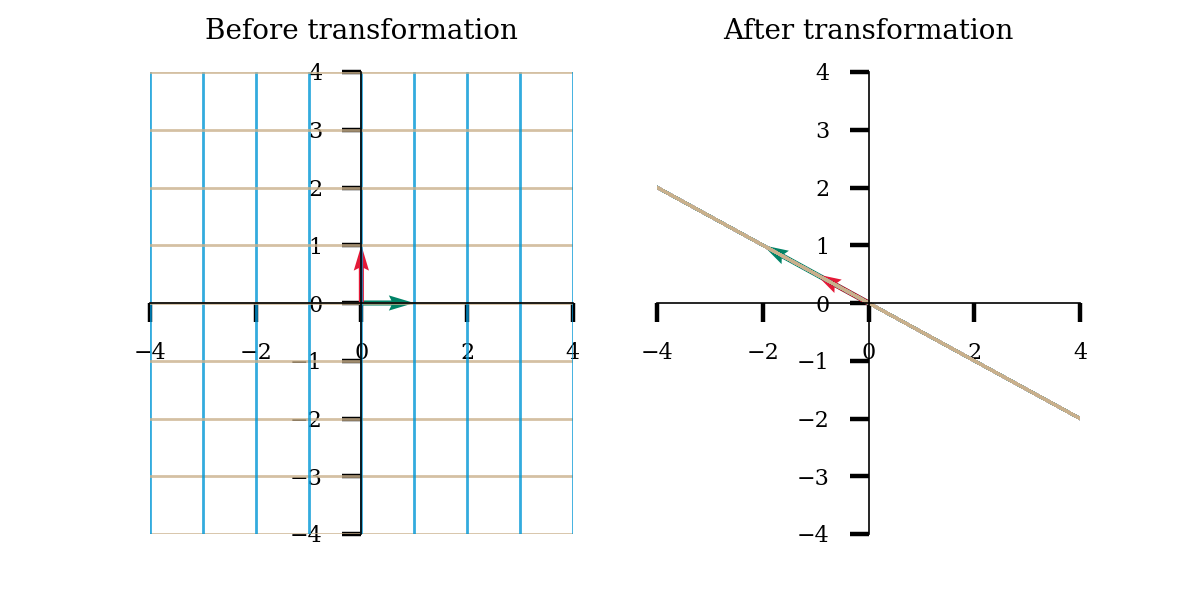

In [34]:
plot_linear_transformation(D)

Yikes! That's not good. We encountered this in the previous lesson, when we plotted 30 vectors made as (random) linear combinations of the column vectors:

$$
   \mathbf{a} = \left[ \begin{array}{c} -2 \\ 1  \end{array} \right], \quad
   \mathbf{d} = \left[ \begin{array}{c} -1 \\ 0.5  \end{array} \right] 
$$

These two vectors are co-linear, i.e., their span is just a line.
If you tried to obtain the inverse of $D$ using `numpy.linalg.inv(D)`, you will see the error message:
```Python
LinAlgError: Singular matrix
```

And if you try to solve the linear system with `numpy.linalg.solve(D, c)`, you will see the same error message.
We can try to figure out what is happening using the row-by-row perspective, by which the two line equations are: 

$$
\begin{align*}
y &= -1 - 2x\\
y &= (5 - x)/0.5
\end{align*}
$$

<IPython.core.display.Javascript object>


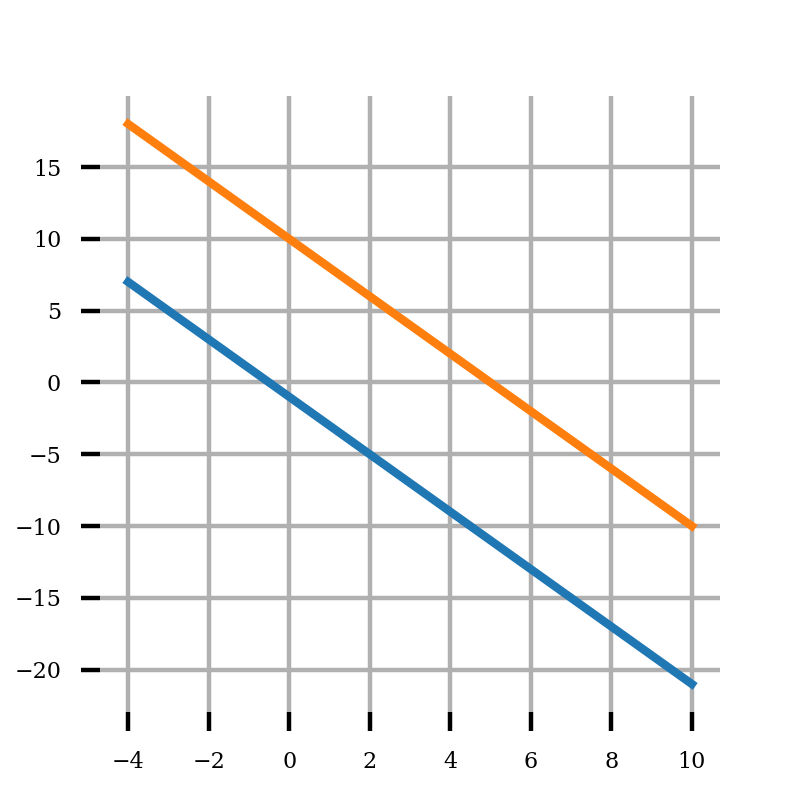

In [35]:
xvalues = numpy.linspace(-4,10)
m1, b1, m2, b2, = -2, -1, -2, 10

pyplot.figure(figsize=(2,2))
pyplot.plot(xvalues, m1*xvalues+b1)
pyplot.plot(xvalues, m2*xvalues+b2)
pyplot.box(False)
pyplot.grid(True);

The two lines are parallel and they thus never intersect: the system has no solution, or is **inconsistent**. 

If the right-hand-side vector were _itself_ colinear with the column vectors of $D$, then the system would have infinite solutions (the two equations are the same), or be **underdetermined**.
For example, with the following right-hand-side vector
$$
   \left[ \begin{array}{c} -4 \\ 2  \end{array} \right]
$$
the linear system, row-by-row, is
$$
\begin{align*}
-2x -1y &= -4 \\
1x + 0.5y &= 2
\end{align*}
$$
You can see that the first equation is the same as the second equation multiplied by $-2$, and it adds no new information. 
The single equation, viewed as a transformation, takes a 2D vector as input, and gives a scalar as output. What is the matrix? 
Think about the left-hand side, $1x+0.5y$, as a linear combination of two matrix columns, scaled by the vector components: the column vectors are 1D, in this case, and the matrix is _non-square_:

$$\begin{bmatrix} 1 & 0.5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 2
$$

We will discuss non-square matrices in Lesson 4. The key idea is that they represent transformations _between dimensions_ (in this case, from 2D to 1D).

## A matrix is a change of basis

We discussed _basis vectors_ in the previous lesson. Typically, we visualize the 2D plane as a grid of horizontal and vertical lines and use the unit vectors as basis:

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix},  \quad
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  
$$

This is the _standard basis_. But the definition of a basis allows us to choose any two _linearly independent_ vectors that span the 2D space. 
Why would you choose a different set of basis vectors? 
It could be that choosing a different basis makes a particular problem easier to solve.

All the vectors in the plane can be written as a linear combination of the basis vectors. That power is what makes them a basis in the first place!

Take the vector $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$. It is equal to $x\,\mathbf{i}+y\,\mathbf{j}$.

##### Definition:

> A vector's **coordinates** are the scalars in the linear combination of the basis vectors that express that vector.

Suppose we need to express the vector $\mathbf{v}= \begin{bmatrix} -3 \\ 0 \end{bmatrix}$ as a linear combination of

$$
\mathbf{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix},  \quad
\mathbf{b} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}  
$$

These are the vectors that form the column of our matrix $C$ from the previous section.

In [36]:
print(C)

[[2 1]
 [1 2]]


In the standard basis, the vector's coordinates are $(-3, 0)$. We're asking what its coordinates would be if we used $\mathbf{a}$ and $\mathbf{b}$ as basis vectors. 
Given that matrix multiplication is a linear combination of the matrix columns scaled by the vector coordinates, we're asking to find $\mathbf{x}$ such that

$$ C\mathbf{x}=\mathbf{v} $$

Well, that amounts to solving a linear system. Here is the solution:

In [37]:
v = numpy.array([-3,0])
x = numpy.linalg.solve(C, v)
print(x)

[-2.  1.]


The vector $\mathbf{v}$ has coordinates $(-2,1)$ in the new basis $\mathbf{a}$ and $\mathbf{b}$. 

Let's visualize the change of basis from $\mathbf{i}$ and $\mathbf{j}$ to $\mathbf{a}$ and $\mathbf{b}$, and see how the same vector $\mathbf{v}$ is represented by different bases. Here we use our custom plotting function `plot_change_basis()` which takes the new basis vectors' coordinates in the standard basis as arguments.

<IPython.core.display.Javascript object>


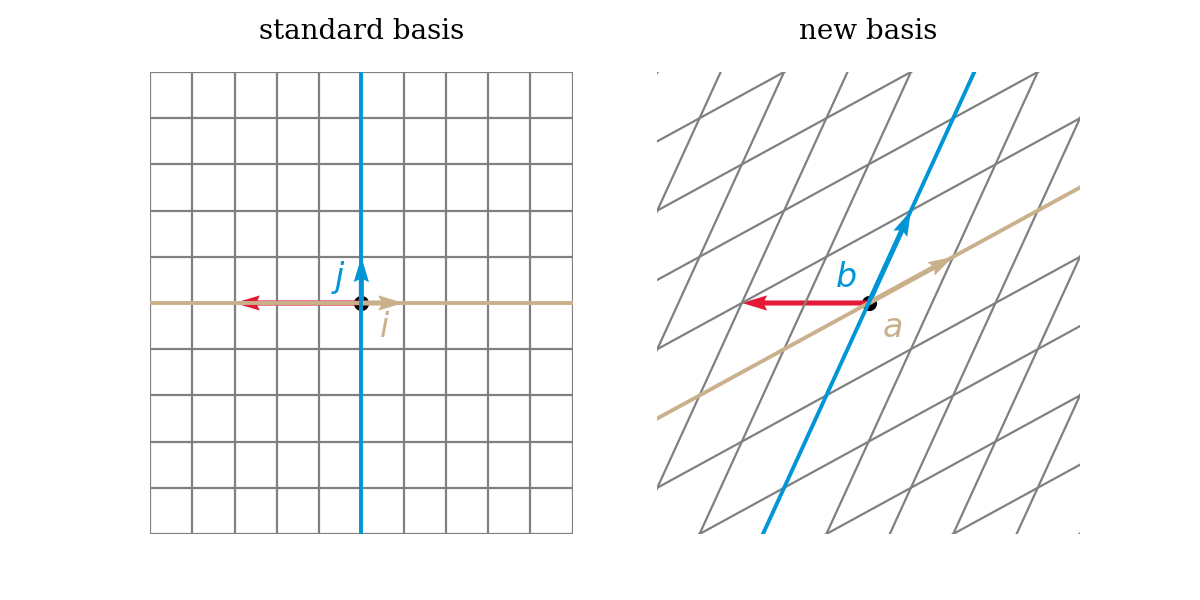

In [38]:
a = numpy.array([2,1])
b = numpy.array([1,2])
plot_change_basis(a, b, v)

On the left plot, $\mathbf{v}$ is represented by $-3\,\mathbf{i}+0\,\mathbf{j}$, so it has coordinates $(-3,0)$ in the standard basis. 

On the right plot, the same vector $\mathbf{v}$ is represented by $-2\,\mathbf{a}+1\,\mathbf{b}$, so it has coordinates $(-2,1)$ in the new basis, which verifies our result using `numpy.linalg.solve`.

##### Key idea:

> The matrix $C$ formed with the new basis vectors as columns is the matrix that converts from the coordinate system using that basis, to the standard basis.

Going the other way around, from the standard basis to the new basis, we need to multiply by $C^{-1}$. That's why we had to _solve_ $ C\mathbf{x}=\mathbf{v} $ above to get the coordinates on the new basis of the vector $\mathbf{v}$.

What if we wanted to apply a known transformation to some vector expressed in the new basis? We have the matrix that represents the transformation in the standard basis. For example, consider the 90-degree rotation, $R$:
$$ R = \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix} $$

We would need to first change the representation of the vector to the standard basis (multiplying by $C$), then apply the transformation, then change back to the new basis—we need $C^{-1}R\, C \,\mathbf{x}$.

##### Note:

Not _all_ matrices are a change of basis. Remember that a basis is a set of linearly independent vectors that span the space. To be a change of basis, a matrix needs to have linearly independent columns.

If you need a bit more help understanding change of basis, we recommend episode 12 of the wonderful series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) [1].

##### Think:

> As a linear transformation, a matrix transforms a vector to a new vector under the same basis. As a change of basis, a matrix can express the same vector's coordinates in a new coordinate system (new basis).


## Matrices in three-dimensional space

The ideas of a matrix as a linear transformation, as a linear system of equations, or as a change of basis apply in any dimension. As for the idea that a matrix transforms a circle to an ellipse, it generalizes to transforming a sphere to an ellipsoid—in any dimension! It is easier to _visualize_ what is going on in two dimensions, so we begin there and establish the foundations. 

Let's now make the jump to the third dimension! You could start by watching the short episode 5 of _"Essence of Linear Algebra"_ [2].

### Linear transformations in 3D

We'll use a helper function, `plot_3d_linear_transformation()`, which takes a $3\times 3$ matrix, and draws a set of grid lines in perspective, before and after the transformation. 

Let's try it with this matrix:

$M = \begin{bmatrix}
             1 & 0 & 1 \\
             1 & 1 & 0 \\
             -1 & 1 & 1
             \end{bmatrix} $

Notice, again, that we create the matrix as a NumPy array with a list of rows.

In [39]:
M = numpy.array([[1,0,1], [1,1,0], [-1,1,1]])
print(M)

[[ 1  0  1]
 [ 1  1  0]
 [-1  1  1]]


<IPython.core.display.Javascript object>


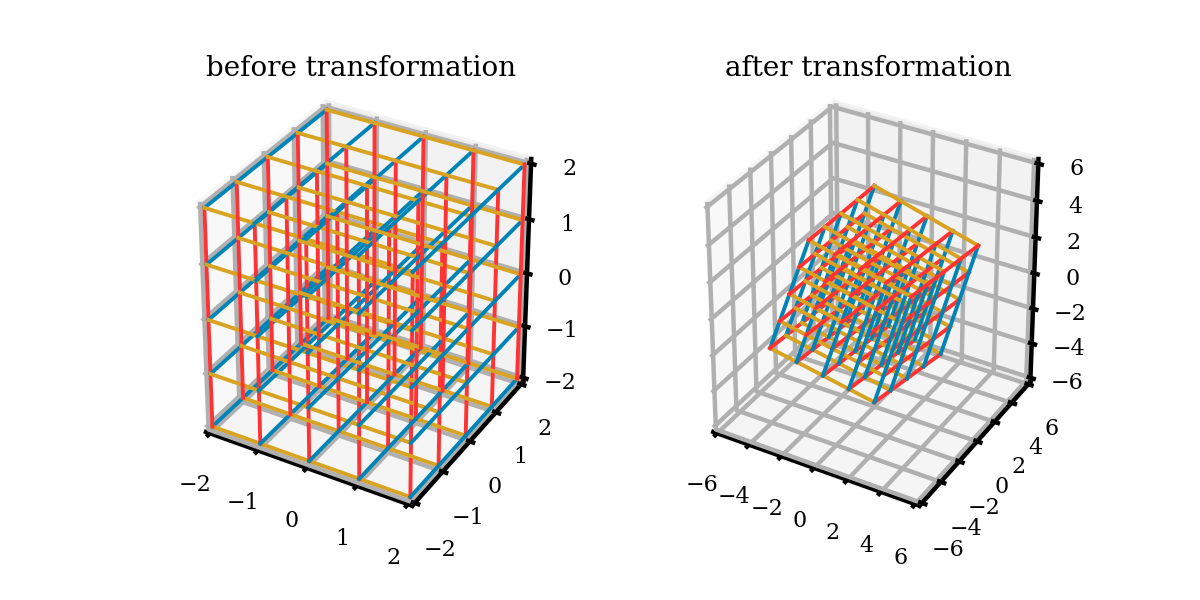

In [40]:
plot_3d_linear_transformation(M)

With a 3D transformation, it's a little harder to figure out from the visualization what the matrix is doing. But the idea of a transformation as a matrix-vector multiplication, and in turn as a linear combination of the matrix columns, is the same.

Let's consider the multiplication of $M$ with a 3D vector $\mathbf{x}=\begin{bmatrix}
             x \\
             y \\
             z \end{bmatrix}$

$$
  M \mathbf{x} = x \, \begin{bmatrix}1 \\ 1 \\-1 \end{bmatrix}+
                 y \, \begin{bmatrix}0 \\ 1 \\ 1 \end{bmatrix}+
                 z \, \begin{bmatrix}1 \\ 0 \\ 1 \end{bmatrix}
$$

The transformation will take the unit vector $\mathbf{i}$, which in 3D has coordinates $(1, 0, 0)$ to the first column of the matrix. We can make a mental effort (or draw a picture) to imagine that the vector rotates around the $z$ axis to touch with its head the grid plane $y=1$, then rotates downwards to $z=-1$. 

##### Challenge:
> Make a sketch on a piece of paper of how each unit vector is transformed by $M$.

### 3D systems of linear equations

Suppose that we have a vector $\mathbf{u}$ in the transformed space, and we want to find out the vector it came from in the original space. Just like in the 2D case, this question is answered by solving a linear system of equations.

With the multiplication $M\mathbf{x}$ written out element-wise, and taking the right-hand-side vector as $(-1, 0, 2)$, we have:


$$
\begin{align*}
x + z &= -1 \\
x + y   &= 0 \\
-x + y + z &= 2
\end{align*}
$$

We can solve this system using `numpy.linalg.solve()`, as before:

In [41]:
u = numpy.array([-1, 0, 2])
x = numpy.linalg.solve(M, u)
print(x)

[-1.  1.  0.]


The matrix $M$ takes a vector $\mathbf{x}$ with coordinates $(-1, 1, 0)$ and transforms it to a vector $\mathbf{u}$ with coordinates $(-1, 0, 2)$.

We can write the general system as $M\mathbf{x} = \mathbf{u}$, and sometimes say that $\mathbf{x}$ is the _input vector_ and $\mathbf{u}$ the _output vector_ of the transformation $M$.

### Dimension and rank

Let's play with a different matrix:

$N = \begin{bmatrix}
             1 & 2 & 7 \\
             0 & 1 & 3 \\
             -3 & 1 & 0
             \end{bmatrix} $

The interactive mode of figures in a Jupyter notebook obtained with the `%matplotlib notebook` magic lets us drag the 3D plot to view different camera angles. Go ahead and move around the plot of the grid after transformation via matrix $N$.

[[ 1  2  7]
 [ 0  1  3]
 [-3  1  0]]


<IPython.core.display.Javascript object>


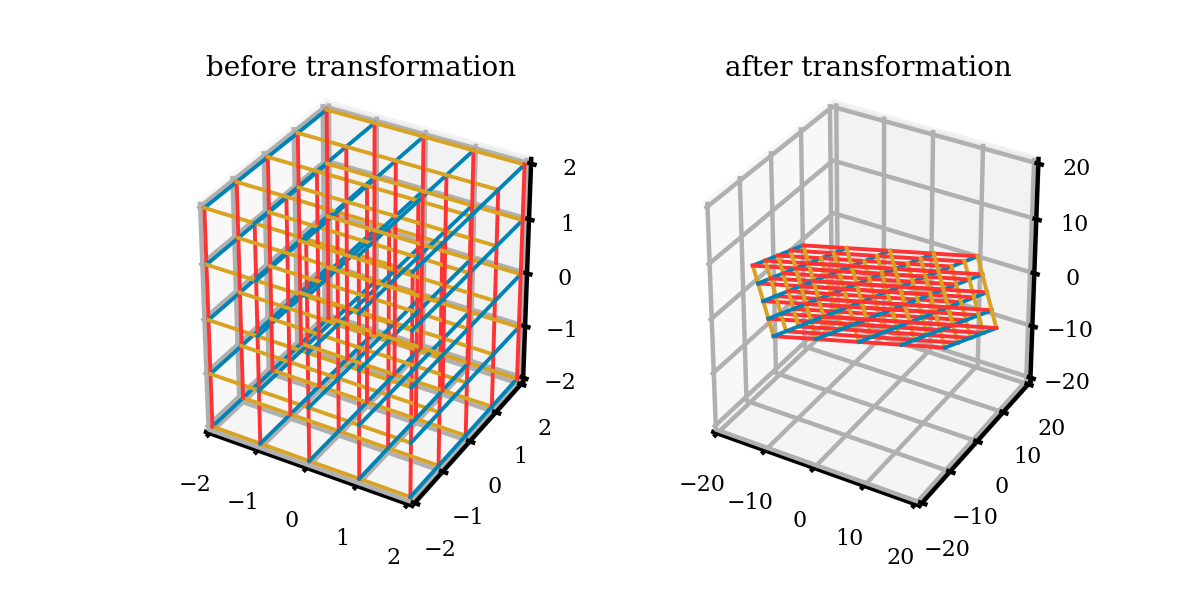

In [42]:
N = numpy.array([[1,2,7], [0,1,3], [-3,1,0]])
print(N)
plot_3d_linear_transformation(N)

If you drag around the viewing angle of the plot, at some point you can visualize that the wireframe cube of grid lines before the transformation actually lands all flat, on an inclined plane, after the transformation. 
It means that _every_ three-dimensional vector, when multiplied by $N$, will land on a plane: a two-dimensional space. We lost a dimension!

What is going on here?

Let's look at the system of equations $N\,\mathbf{x}= \mathbf{0}$ (the zero vector), and write it out by rows:

$$
\begin{align*}
  x + 2y + 7z &= 0 \\
      y  + 3z &= 0 \\
-3x + y       &= 0
\end{align*}
$$

The last linear equation gives $y=3x$, which when plugged back in the first and second equations gives: $7x+7z=0$, and $3x+3z=0$. These two equations are the same! Pick any value of $z$, and you can pick $x=-z$ and $y=3x$ to satisfy the system—$z$ is a _free variable_.

##### Definition:

> A linear system with a zero-vector on the right-hand side is called **homogeneous**. The set of all solutions to the homogeneous system $N\,\mathbf{x}= \mathbf{0}$ is called the **nullspace** of $N$ (sometimes called "kernel").

The nullspace of our matrix $N$ is all the scalings: 
$\; z \begin{bmatrix}
             -1 \\
             -3 \\
              1 \end{bmatrix}$.

This is a line: a one-dimensional space. When the nullspace of a matrix has non-zero dimension (i.e., the zero vector is not its only solution), it means its columns are _linearly dependent_.

Recall when we said that not all matrices can be a change of basis? To be a change of basis, its columns need to be linearly independent. In this case, the columns of $N$ are not a basis for 3D space—the space spanned by the columns of $N$ is a plane, i.e., it's two-dimensional.

##### Definition:

> The dimension of the column space of a matrix is called its **rank**.

We can get the rank of a matrix with NumPy using the `numpy.linalg.matrix_rank()` function. Check it out:

In [43]:
numpy.linalg.matrix_rank(N)

2

Our matrix $N$ is $3\times3$—if its rank were $3$, we would say that it has _full rank_: its rank matches the number of columns. But the rank of $N$ is $2$, so we say that it's _rank deficient_ or _singular_. In the 2D case, a matrix with two linearly dependent columns has rank $1$, and transforms all vectors onto a line. 

Rank-deficient matrices reduce dimensionality and are called _projections_. They are useful in many applications, like architecture and computer graphics, where you can use them to cast shadows.

Let's now play with the matrix:

$L = \begin{bmatrix}
             1 & 2 & 1 \\
             -1 & -2 & -1 \\
             3 & 6 & 3
             \end{bmatrix} $

[[ 1  2  1]
 [-1 -2 -1]
 [ 3  6  3]]


<IPython.core.display.Javascript object>


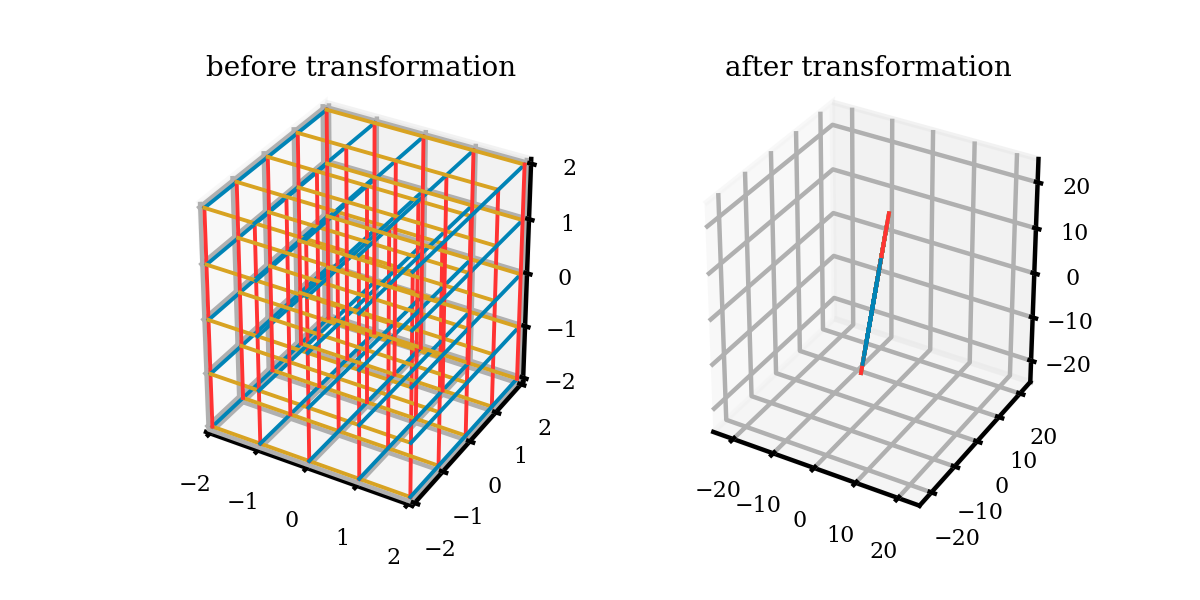

In [44]:
L = numpy.array([[1,2,1], [-1,-2,-1], [3,6,3]])
print(L)
plot_3d_linear_transformation(L)

As you drag around our plot of the wireframe cube after the transformation, you see that it's just a line. In this case, the matrix takes every 3D vector to a one-dimensional space, because it has rank $1$.

In [45]:
numpy.linalg.matrix_rank(L)

1

Can we solve a system of equations if the system matrix is rank-deficient?

The answer is no (in general). Imagine trying to find the inverse transformation that takes vectors from a plane (or a line) and builds back the 3D space. That's just not possible: the matrix inverse does not exist (we say the matrix is _not invertible_) when the matrix is not full rank.

## What we've learned

- How to compute the norm of a vector.
- A 2D matrix transforms a unit circle into an ellipse.
- The vectors that don't change direction after a linear transformation are eigenvectors of the matrix.
- For any vector in the transformed space, find the vector it came from by solving $A\mathbf{x}=\mathbf{c}$ for $\mathbf{x}$.
- Look at the 2D linear system row-by-row and interpret each row as a line; the solution is the point of intersection.
- Use `numpy.linalg.solve()` to get the solution vector.
- In 2D, when the two rows of the linear system represent parallel lines, the system is inconsistent (no solution).
- The vectors $\mathbf{i}=(1,0)^T$ and $\mathbf{j}=(0,1)^T$ are the standard basis in 2D.
- Form a matrix $C$ with any pair of basis vectors as columns: it transforms vectors from the coordinate system using that basis to the standard basis. To tranform vectors from the standard basis to the new basis, multiply by $C^{-1}$.
- Apply a known transformation $R$ by transforming to the standard basis first, then back: $C^{-1} R C\mathbf{x}$.
- A homogeneous linear system has the zero vector on the right-hand side.
- The set of all solutions to the homogeneous system $N\,\mathbf{x}=\mathbf{0}$ is the nullspace of N.
- The rank of a matrix is the dimension of its column space.

## References

1. Change of basis. Essence of linear algebra, chapter 12. Video at https://youtu.be/P2LTAUO1TdA (2016), by Grant Sanderson.

2. Three-dimensional linear transformations. Essence of linear algebra, chapter 5. Video at https://youtu.be/rHLEWRxRGiM (2016), by Grant Sanderson.

In [46]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())